Завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі -

***RNN, LSTM, двостороння та глибока***.

Порівняйте результати та зробіть висновки.



https://developer.imdb.com/?ref_=header

https://uk.wikipedia.org/wiki/Internet_Movie_Database

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding, GRU, Dense, LSTM, SimpleRNN

from sklearn.metrics import classification_report, confusion_matrix

Встановлення гіперпараметрів

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# ***Побудова простої моделі RNN:***


In [5]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

Компіляція моделі:



In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Навчання моделі:



In [7]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - acc: 0.5470 - loss: 0.6825 - val_acc: 0.7380 - val_loss: 0.5451
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - acc: 0.7847 - loss: 0.4668 - val_acc: 0.8188 - val_loss: 0.4087
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - acc: 0.8666 - loss: 0.3290 - val_acc: 0.7843 - val_loss: 0.4853
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - acc: 0.8762 - loss: 0.3024 - val_acc: 0.8245 - val_loss: 0.4061
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - acc: 0.9158 - loss: 0.2220 - val_acc: 0.8421 - val_loss: 0.3941


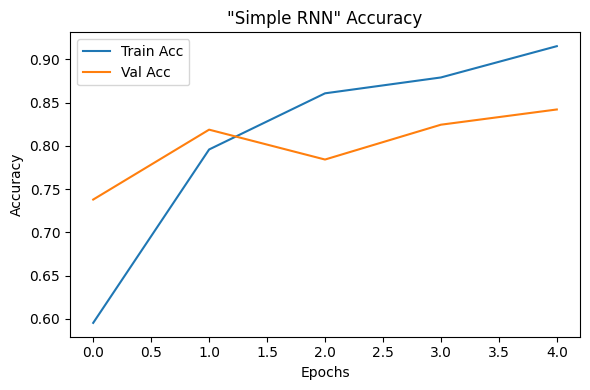

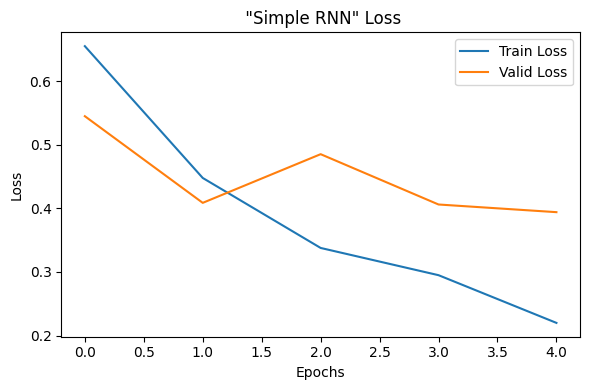

In [8]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"Simple RNN" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "Simple RNN" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Прогнозування з використанням навченої моделі:

In [9]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss Simple RNN Model: {}'.format(test_loss))
print('Test Accuracy Simple RNN Model: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - acc: 0.8367 - loss: 0.3947
Test Loss Simple RNN Model: 0.3887427747249603
Test Accuracy Simple RNN Model: 0.8389999866485596


In [10]:
print('Test Loss Simple RNN Model: {}'.format(test_loss))
print('Test Accuracy Simple RNN Model: {}'.format(test_acc))

Test Loss Simple RNN Model: 0.3887427747249603
Test Accuracy Simple RNN Model: 0.8389999866485596


# ***Побудова моделі LSTM:***

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - acc: 0.5586 - loss: 0.6777 - val_acc: 0.7711 - val_loss: 0.4910
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - acc: 0.7829 - loss: 0.4693 - val_acc: 0.8508 - val_loss: 0.3628
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - acc: 0.8560 - loss: 0.3522 - val_acc: 0.8165 - val_loss: 0.4116
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.8743 - loss: 0.3096 - val_acc: 0.8497 - val_loss: 0.3572
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.8885 - loss: 0.2802 - val_acc: 0.8687 - val_loss: 0.3166


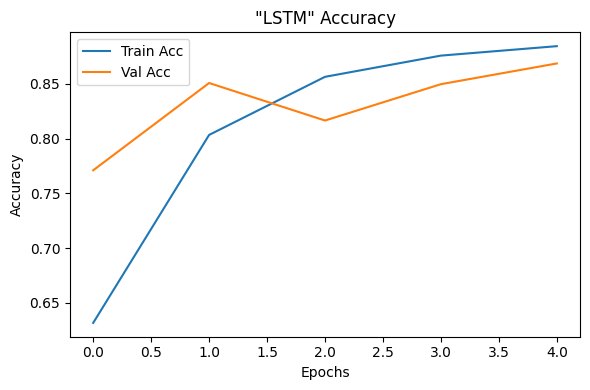

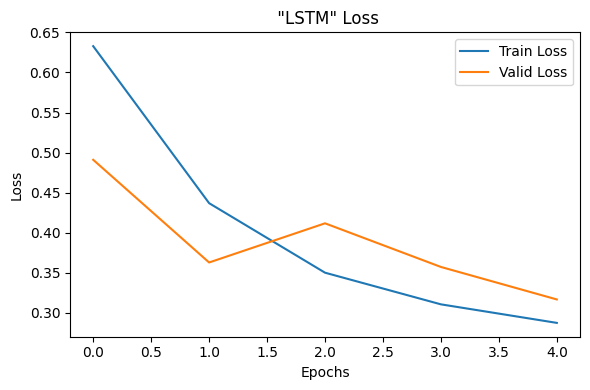

In [15]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"LSTM" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "LSTM" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss LSTM Model: {}'.format(test_loss))
print('Test Accuracy LSTM Model: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8656 - loss: 0.3216
Test Loss LSTM Model: 0.3203880786895752
Test Accuracy LSTM Model: 0.8655999898910522


In [17]:
print('Test Loss LSTM Model: {}'.format(test_loss))
print('Test Accuracy LSTM Model: {}'.format(test_acc))

Test Loss LSTM Model: 0.3203880786895752
Test Accuracy LSTM Model: 0.8655999898910522


# Побудова моделі ***Bidirectional RNN*** :

In [18]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - acc: 0.5602 - loss: 0.6741 - val_acc: 0.7892 - val_loss: 0.4782
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - acc: 0.7966 - loss: 0.4557 - val_acc: 0.8321 - val_loss: 0.3900
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - acc: 0.8484 - loss: 0.3606 - val_acc: 0.8628 - val_loss: 0.3419
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - acc: 0.8780 - loss: 0.3048 - val_acc: 0.8708 - val_loss: 0.3176
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - acc: 0.8922 - loss: 0.2771 - val_acc: 0.8783 - val_loss: 0.3028


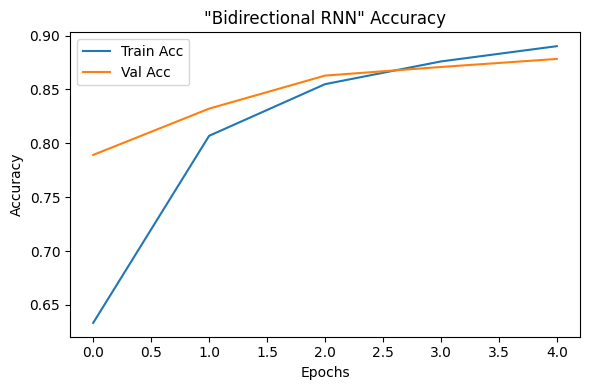

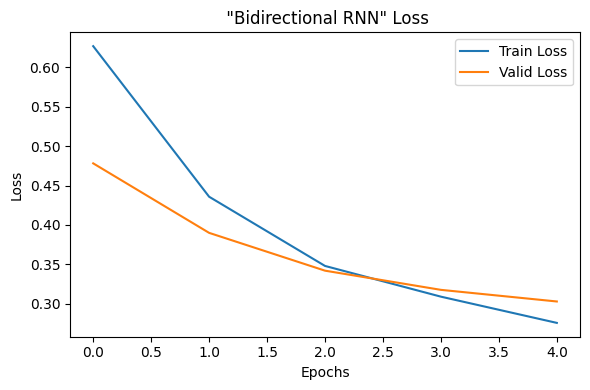

In [22]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"Bidirectional RNN" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "Bidirectional RNN" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss Bidirectional RNN: {}'.format(test_loss))
print('Test Accuracy Bidirectional RNN: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.8709 - loss: 0.3120
Test Loss Bidirectional RNN: 0.3089997172355652
Test Accuracy Bidirectional RNN: 0.8733599781990051


In [24]:
print('Test Loss Bidirectional RNN: {}'.format(test_loss))
print('Test Accuracy Bidirectional RNN: {}'.format(test_acc))

Test Loss Bidirectional RNN: 0.3089997172355652
Test Accuracy Bidirectional RNN: 0.8733599781990051


# ***Побудова моделі DRNN:***

In [25]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - acc: 0.5561 - loss: 0.6711 - val_acc: 0.7839 - val_loss: 0.4707
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - acc: 0.7968 - loss: 0.4499 - val_acc: 0.8177 - val_loss: 0.4253
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - acc: 0.8508 - loss: 0.3534 - val_acc: 0.8257 - val_loss: 0.3798
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - acc: 0.8847 - loss: 0.2880 - val_acc: 0.8713 - val_loss: 0.3232
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - acc: 0.8988 - loss: 0.2605 - val_acc: 0.8712 - val_loss: 0.3106


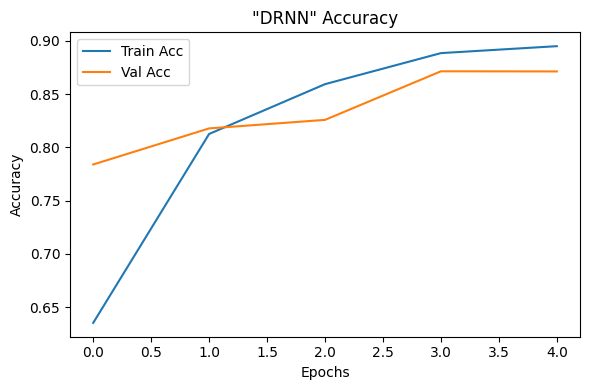

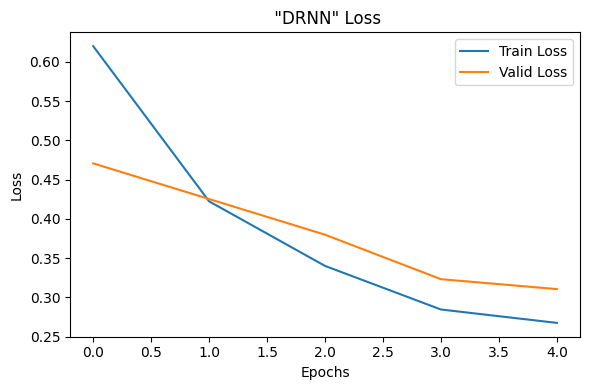

In [29]:
# Accuracy plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.title(f'"DRNN" Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.title(f' "DRNN" Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss DRNN Model: {}'.format(test_loss))
print('Test Accuracy DRNN Model: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.8634 - loss: 0.3195
Test Loss DRNN Model: 0.3183557689189911
Test Accuracy DRNN Model: 0.8650000095367432


In [31]:
print('Test Loss DRNN Model: {}'.format(test_loss))
print('Test Accuracy DRNN Model: {}'.format(test_acc))

Test Loss DRNN Model: 0.3183557689189911
Test Accuracy DRNN Model: 0.8650000095367432


# **Висновки**
В ході даного Домашнього завдання, потрібно було проаналізуати датасет бінарної класифікації (1 - позитивні, 0 - негативні) з рецензіями на фільми/серіали.

Internet Movie Database (IMDb) — найбільша база даних та вебсайт про кінематограф.

Вирішення завдання здійснювалось за допомогою рекурентної нейронної мережі та використовували такі моделі: звичайну Simple RNN, LSTM,  BRNN та  DRNN нейромережі.

***Отже,***

1. У всіх моделях можна спостерігати **високу точність на Навчальних даних**.
Моделі гарно навчаютьс ята адаптуються до начальних даних.

2. На тестових даних модель **Bidirectional RNN** показує найвищу точність та найменьшу помилку порівняно з іншими варіантами моделей. Це означає, що вона краще узагальнює знання на основі нових даних.
